# **Hierarchical Clustering**

The primary goal is to segment customers based on their credit card usage and purchasing patterns.

**Step 1 : Loading the dataset**

In [1]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Clustering/dataset/b_hierarchical_credit_card.csv'
credit_card_data = pd.read_csv(dataset_url)
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Step 2 : Data Preprocessing**

In [2]:
# Step 2: Data Preprocessing

# Checking for missing values
missing_values = credit_card_data.isnull().sum()

# For simplicity, we will drop the 'CUST_ID' as it's not useful for clustering
credit_card_data = credit_card_data.drop(columns=['CUST_ID'])

# Handling missing values - Imputation or Removal
# Here, we'll impute missing values with the mean of the respective column
credit_card_data_filled = credit_card_data.fillna(credit_card_data.mean())

# Feature Scaling - Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_card_data_scaled = scaler.fit_transform(credit_card_data_filled)

# Converting the scaled data back to a DataFrame
credit_card_data_scaled_df = pd.DataFrame(credit_card_data_scaled, columns=credit_card_data_filled.columns)

# Displaying the first few rows of the processed dataset
credit_card_data_scaled_df.head(), missing_values



(    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0 -0.731989          -0.249434  -0.424900         -0.356934   
 1  0.786961           0.134325  -0.469552         -0.356934   
 2  0.447135           0.518084  -0.107668          0.108889   
 3  0.049099          -1.016953   0.232058          0.546189   
 4 -0.358775           0.518084  -0.462063         -0.347294   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0               -0.349079     -0.466786            -0.806490   
 1               -0.454576      2.605605            -1.221758   
 2               -0.454576     -0.466786             1.269843   
 3               -0.454576     -0.368653            -1.014125   
 4               -0.454576     -0.466786            -1.014125   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                   -0.678661                         -0.707313   
 1                   -0.678661                         -0.916995   
 2                

**Step 3 : Building the Dendrogram for Hierarchical Clustering**

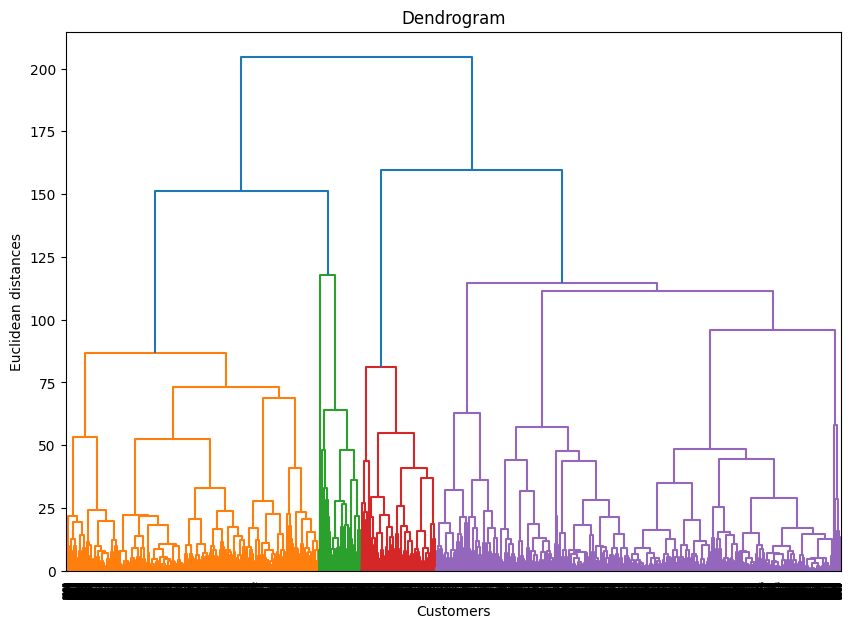

In [3]:
# Step 3: Building the Dendrogram for Hierarchical Clustering

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Creating the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(credit_card_data_scaled_df, method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


**Step 4 : Applying Hierarchical Clustering**

In [4]:
from sklearn.cluster import AgglomerativeClustering

# number of clusters = 5)
n_clusters = 5
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = model.fit_predict(credit_card_data_scaled_df)

# Adding cluster labels to the original data
credit_card_data['Cluster'] = cluster_labels

# Analyzing the clusters
cluster_analysis = credit_card_data.groupby('Cluster').mean()
# Analyzing each cluster
cluster_analysis = credit_card_data.groupby('Cluster').mean()

# Displaying the mean values for each cluster
print(cluster_analysis)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        1082.617273           0.784368    317.087249        190.795311   
1        1115.777861           0.975988   1329.751709        680.440699   
2        4733.393046           0.981978    389.403808        264.281863   
3        3184.721917           0.989440   5672.306078       3606.399440   
4        4812.382778           0.956126  27505.339565      22417.452174   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    126.612072    689.243507             0.258421   
1                    649.478386    422.112009             0.868399   
2                    125.239618   4742.439786             0.204784   
3                   2067.199741    369.871576             0.946771   
4                   5087.887391   1617.786145         

**Visualizations**

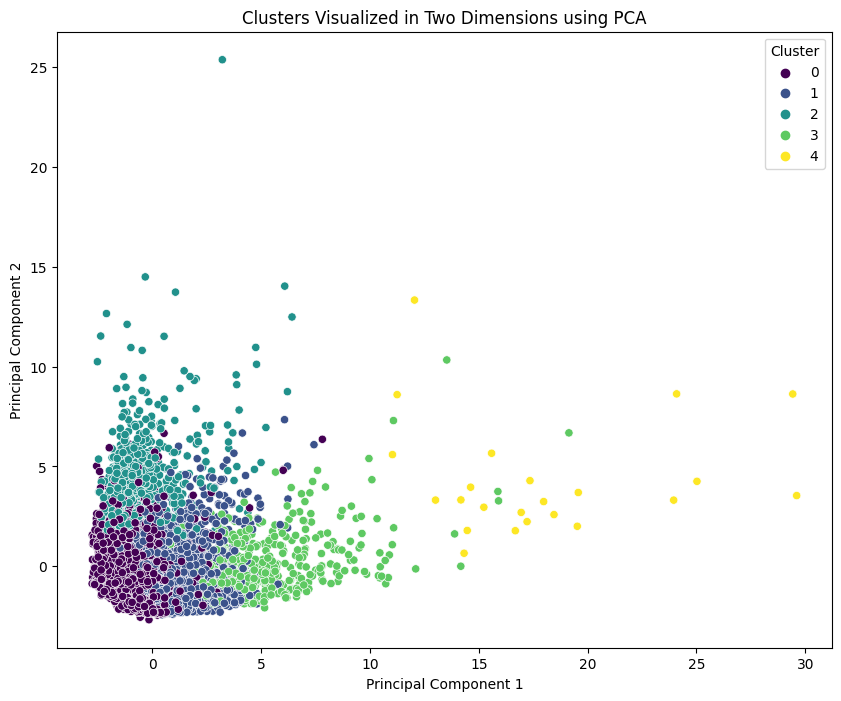

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(credit_card_data_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels  # Ensure 'cluster_labels' is defined in your local environment

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", palette="viridis", data=pca_df, legend="full")
plt.title('Clusters Visualized in Two Dimensions using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


**Cluster 0 - Moderate Users with Lower Spending:**

**Characteristics**: Lower balances and purchases, moderate cash advance usage, lower frequency of purchases.

**Interpretation**: These could be occasional users who use their credit card moderately for both purchases and cash advances.

**Cluster 1 - Regular Shoppers:**

**Characteristics**: Moderate balance, high purchase frequency, and significant installment purchases.

**Interpretation**: This group likely represents regular shoppers who use their card frequently for smaller, regular purchases, mostly in installments.

**Cluster 2 - Cash Advance Users:**

**Characteristics**: High balance, high cash advance usage, low purchase frequency.

**Interpretation**: These customers might be using their credit cards more for cash advances rather than purchases, possibly indicating a reliance on credit for cash liquidity.

**Cluster 3 - High Spenders:**

**Characteristics**: High balance, very high purchase frequency, and high payments.

**Interpretation**: This cluster represents premium customers who use their credit card extensively for various types of purchases and keep up with high payment amounts.

**Cluster 4 - Super Premium Customers:**

**Characteristics**: Extremely high purchases, high credit limit, high payments, and significant full payment ratio.

**Interpretation**: These are likely super premium customers with very high spending and payment capacity, frequently using their card for large purchases and paying a significant portion of the balance in full.